# Problem Statement

Customer Lifetime Value (CLV) denotes the significance of a customer to a company throughout a specific timeframe. In the highly competitive insurance industry, the customer's decision-making process is not solely driven by insurance premiums. CLV serves as a customer-centric metric that forms a strong foundation for retaining valuable customers, maximizing revenue from less valuable customers, and enhancing the overall customer experience.

In order to address customer retention challenges, a renowned auto insurance company is contemplating the use of CLV as a criterion to identify loyal customers. By leveraging CLV as a metric, the company aims to classify and recognize loyal customers, enabling them to effectively target and offer promotional incentives to this valuable segment.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
import plotly.express as px
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor


In [3]:
df=pd.read_csv("AutoInsurance.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.shape

(9134, 24)

In [5]:
df.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   CLV                            9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
num_cols = df.select_dtypes(include=["int64","float64"])

In [8]:
num_cols.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [9]:
num_cols = num_cols.drop(["Number of Policies","Number of Open Complaints"],axis=1)

## Summary Statistics of Numerical features

In [10]:
num_cols.describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


## Checking for duplicate rows

In [11]:
df.duplicated().sum()

0

## Checking for Null values

In [12]:
df.isnull().sum()

Customer                         0
State                            0
CLV                              0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

There are no null values in the data

## EDA

## Numerical Features

### CLV - Target variable analysis

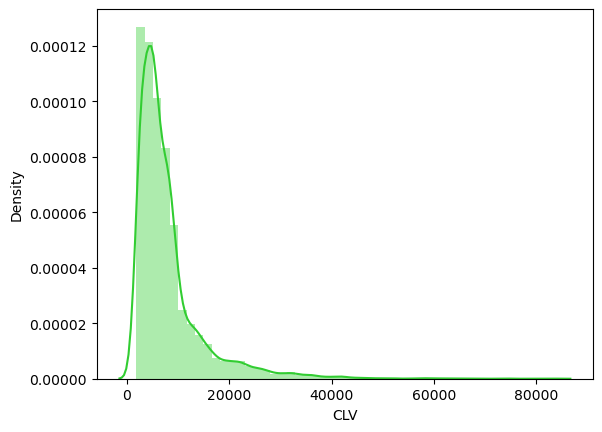

In [13]:
sns.distplot(df["CLV"],color='limeGreen')
plt.show()

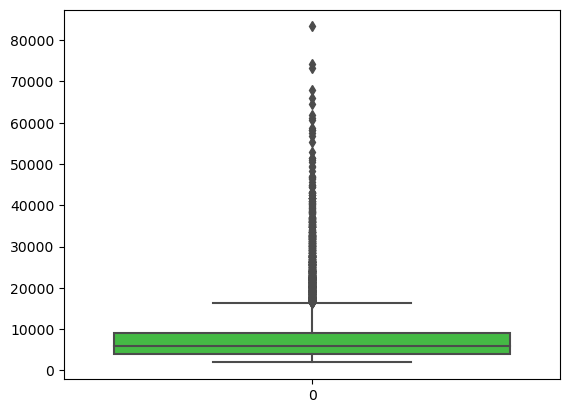

In [14]:
sns.boxplot(df["CLV"],color='limeGreen')
plt.show()

In [15]:
df["CLV"].skew()

3.0322802599299847

Based on the observed distribution and box plot, it can be inferred that the CLV variable exhibits a highly right-skewed distribution with a substantial positive skewness value of 3.03. The presence of numerous outliers in our dependent variable is notable; however, addressing them directly may not be feasible due to their influential nature.

### Income

**Univariate Analysis**

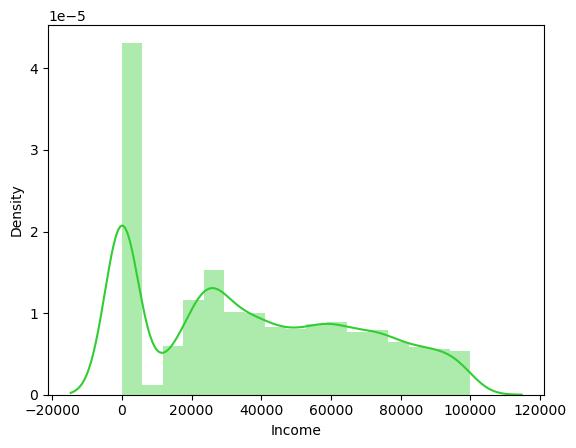

In [16]:
sns.distplot(df['Income'],color='limeGreen')
plt.show()

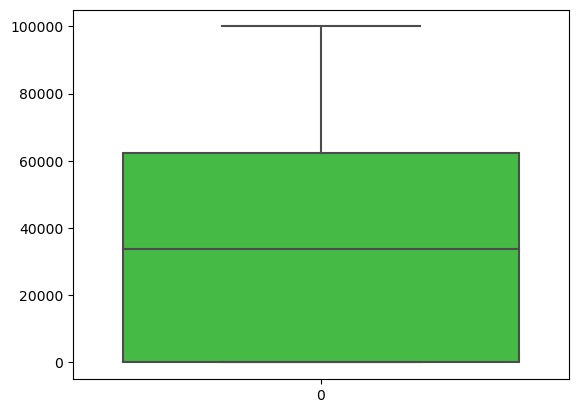

In [17]:
sns.boxplot(df["Income"],color='limeGreen')
plt.show()

**Bivariate Analysis**

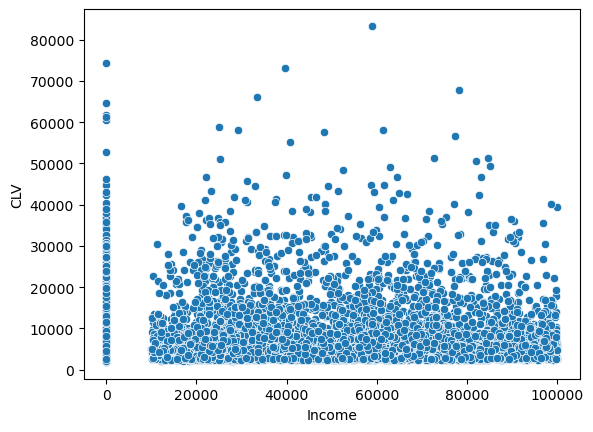

In [18]:
sns.scatterplot(x="Income",y="CLV",data=df)
plt.show()

There is no linear relationship between income and CLV

### Monthly Premium Auto

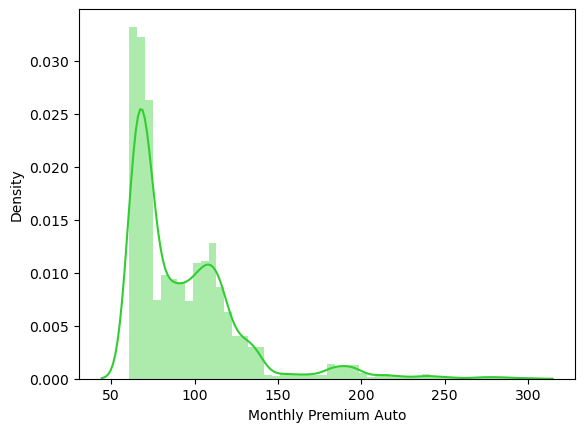

In [19]:
sns.distplot(df["Monthly Premium Auto"],color='limeGreen')
plt.show()

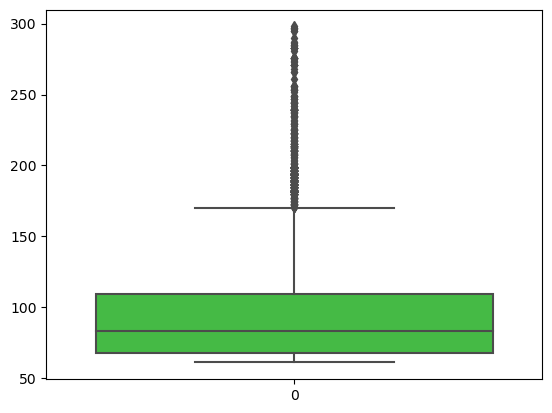

In [20]:
sns.boxplot(df["Monthly Premium Auto"],color='limeGreen')
plt.show()

**Bivariate Analysis**

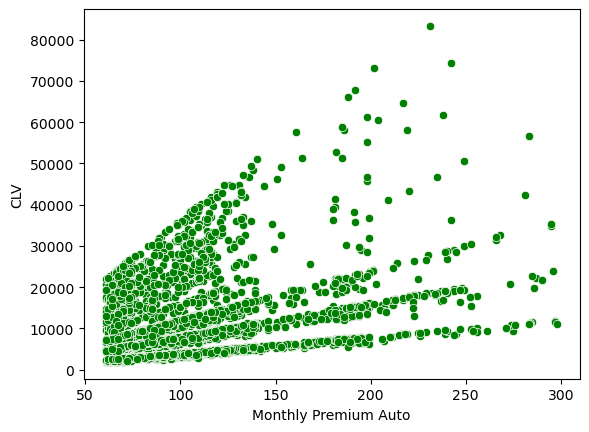

In [21]:
sns.scatterplot(x="Monthly Premium Auto",y="CLV",data=df,color='g')
plt.show()

There is a linear relationship between Monthly Premium Auto and CLV

### Months Since Last Claim

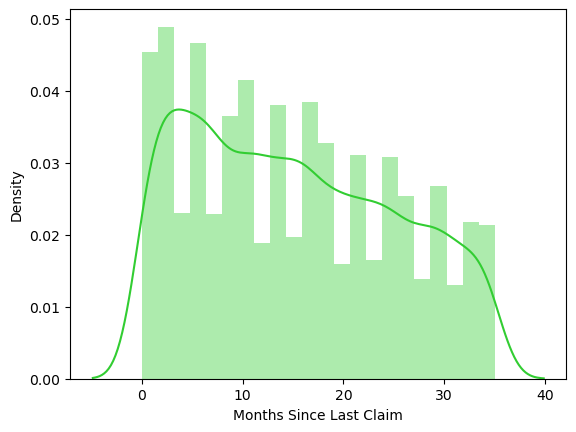

In [22]:
sns.distplot(df['Months Since Last Claim'],color='limeGreen')
plt.show()

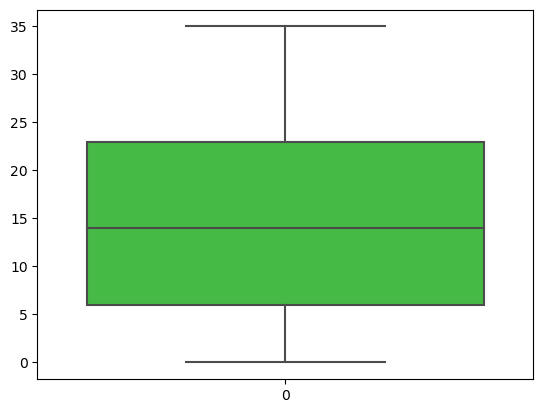

In [23]:
sns.boxplot(df["Months Since Last Claim"],color='limeGreen')
plt.show()

**Bivariate Analysis**

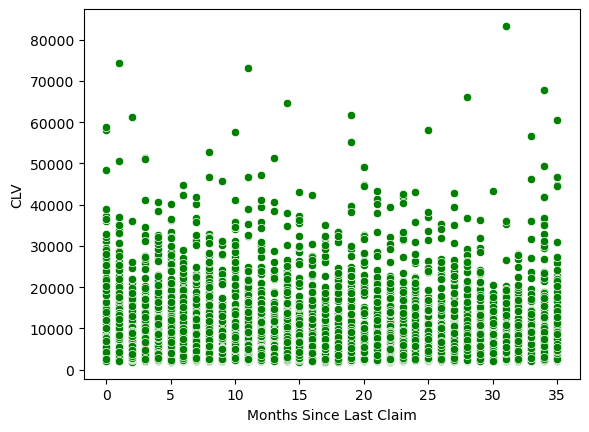

In [24]:
sns.scatterplot(x="Months Since Last Claim",y="CLV",data=df,color='g')
plt.show()

There is no linear relationship between Months Since Last Claim and CLV

### Months Since Policy Inception

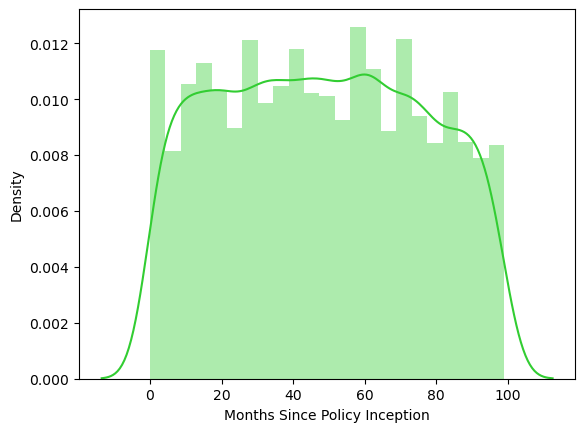

In [25]:
sns.distplot(df['Months Since Policy Inception'],color='limeGreen')
plt.show()

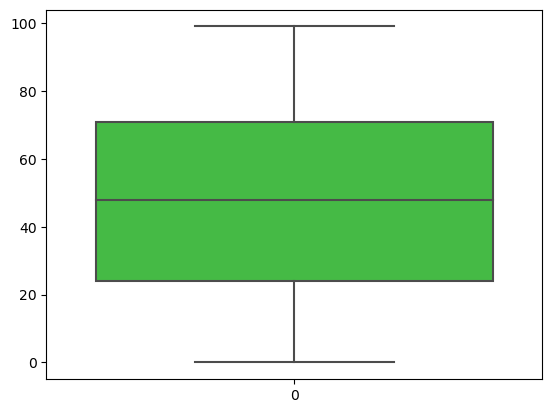

In [26]:
sns.boxplot(df["Months Since Policy Inception"],color='limeGreen')
plt.show()

### Total claim amount

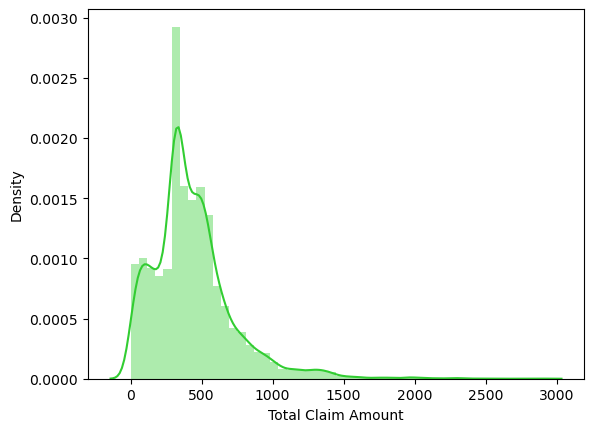

In [27]:
sns.distplot(df['Total Claim Amount'],color='limeGreen')
plt.show()

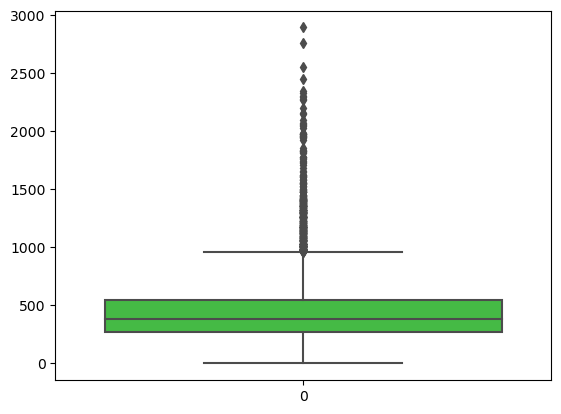

In [28]:
sns.boxplot(df["Total Claim Amount"],color='limeGreen')
plt.show()

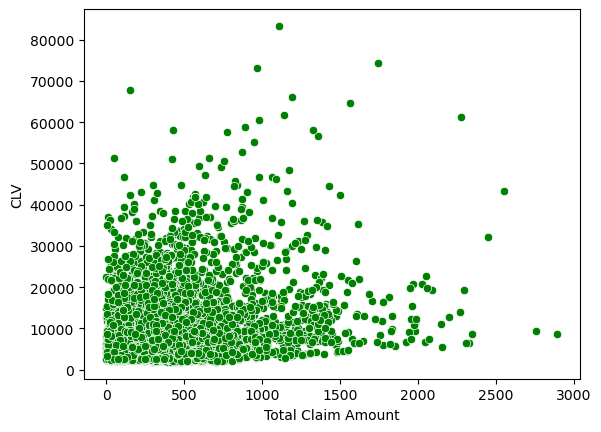

In [29]:
sns.scatterplot(x="Total Claim Amount",y="CLV",color='g',data=df)
plt.show()

There is a linear relationship between CLV and Total Claim Amount

The monthly premium auto and income feature has multiple peak's so to remove those peaks we can apply any of the power transformation (SQUARE / CUBE)

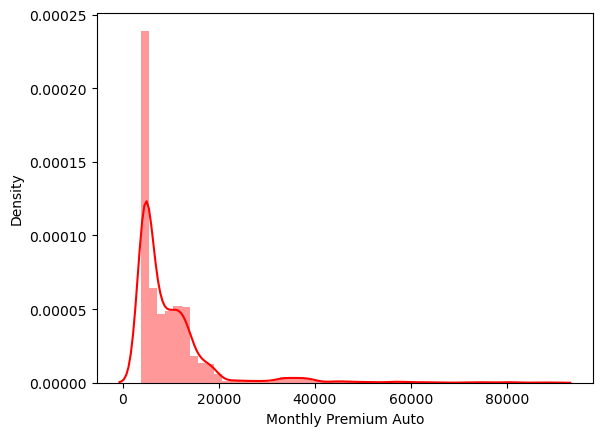

In [30]:
sns.distplot(np.square(df["Monthly Premium Auto"]),color='red')
plt.show()

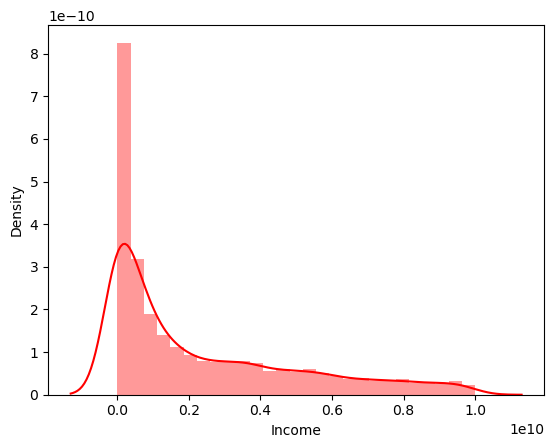

In [31]:
sns.distplot(np.square(df["Income"]),color='r')
plt.show()

Upon applying the square transformation to the data, it becomes apparent that the distribution becomes heavily skewed. Therefore, it is decided to revert back to using the original distribution of the feature in our model building process. building.

## Categorical variables

In [32]:
cat_cols = df.select_dtypes(include="object")

In [33]:
no_col = df[["Number of Policies","Number of Open Complaints"]]

In [34]:
cat_cols = pd.concat([cat_cols,no_col],axis=1)

In [35]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Policies,Number of Open Complaints
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,1,0
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,8,0
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2,0
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,7,0
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,1,0


In [36]:
cat_cols.drop("Effective To Date",axis=1,inplace=True)

In [37]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Policies',
       'Number of Open Complaints'],
      dtype='object')

In [38]:
for j in cat_cols:
    print("Unique values in",str(j),"is",df[j].nunique())
    print(df[j].value_counts())
    print("-----------------------------------------")

Unique values in Customer is 9134
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64
-----------------------------------------
Unique values in State is 5
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
-----------------------------------------
Unique values in Response is 2
No     7826
Yes    1308
Name: Response, dtype: int64
-----------------------------------------
Unique values in Coverage is 3
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
-----------------------------------------
Unique values in Education is 5
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
-----------------------------------------
Unique values in Em

Since the "Customer" column in the dataset consists of unique values for each record, it does not contribute any meaningful information and can be safely excluded during the model building process.

### State

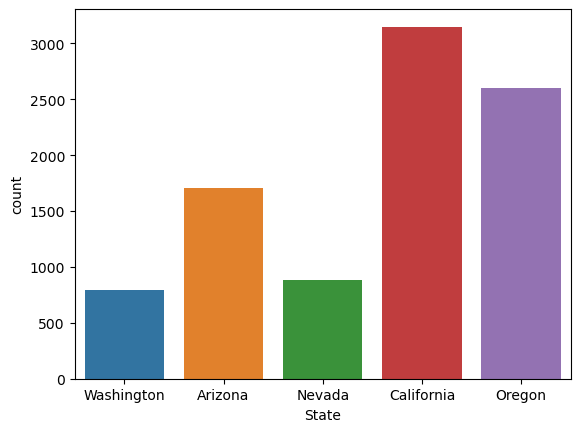

In [39]:
sns.countplot(data=df,x="State")
plt.show()

Most number of people are residing in california

### Response

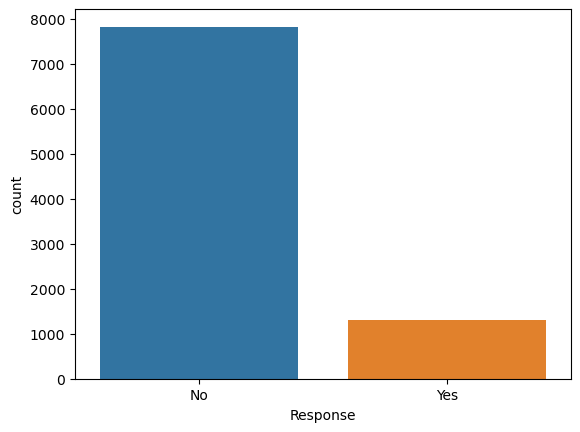

In [40]:
sns.countplot(data=df,x="Response")
plt.show()

The number of customers who responded to the marketing calls appears to be below 1400. 

### Coverage

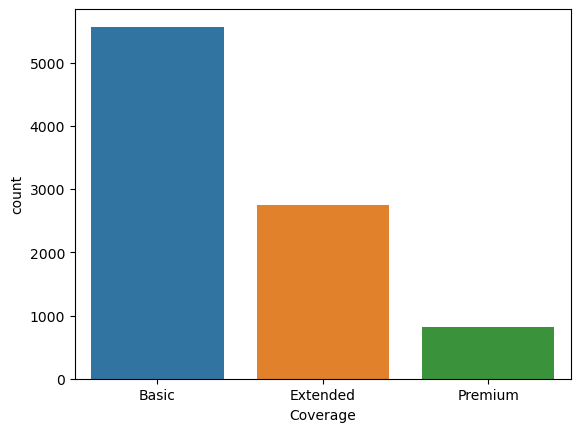

In [41]:
sns.countplot(data=df, x="Coverage")
plt.show()

### Education

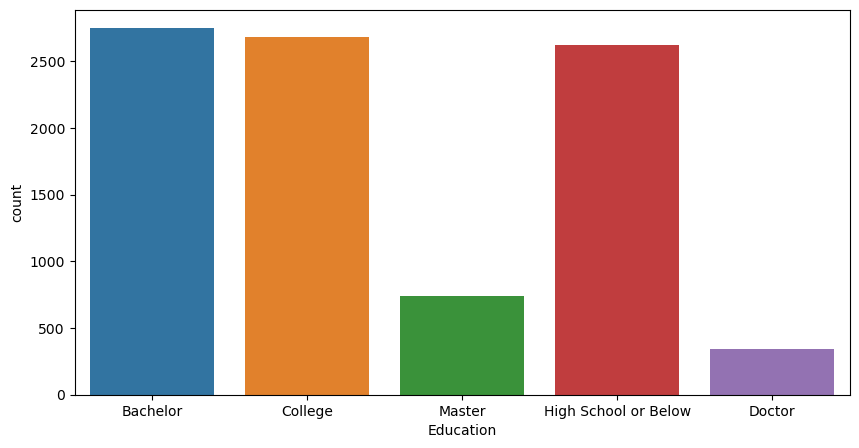

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="Education")
plt.show()

Most of the customers have either a bachelor or college degree

### EmploymentStatus

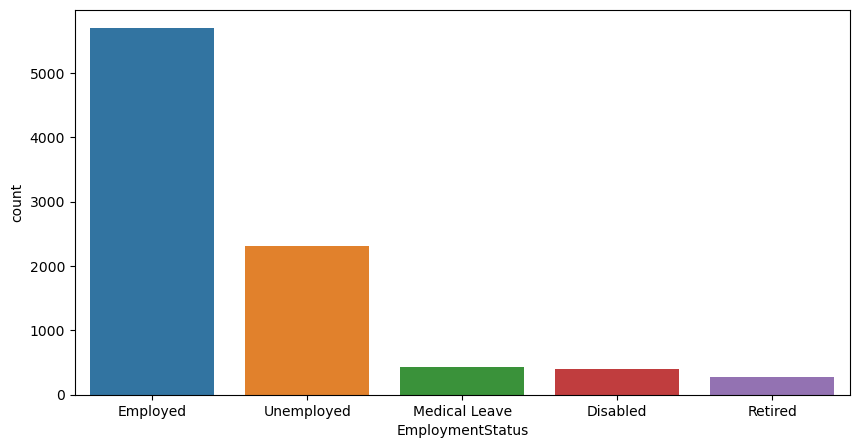

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="EmploymentStatus")
plt.show()

In [44]:
df["EmploymentStatus"].value_counts(normalize=True)*100

Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64

Around 62.38% of the customers are employed

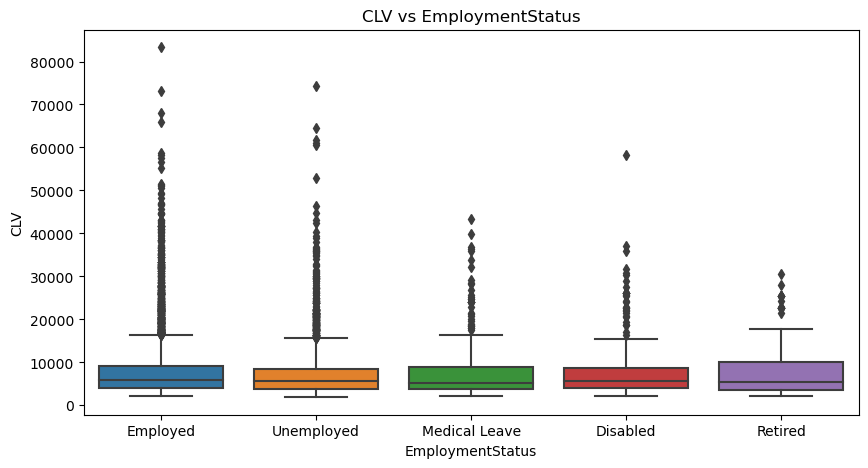

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['EmploymentStatus'],y=df['CLV'])
plt.title("CLV vs EmploymentStatus")
plt.show()

### Gender

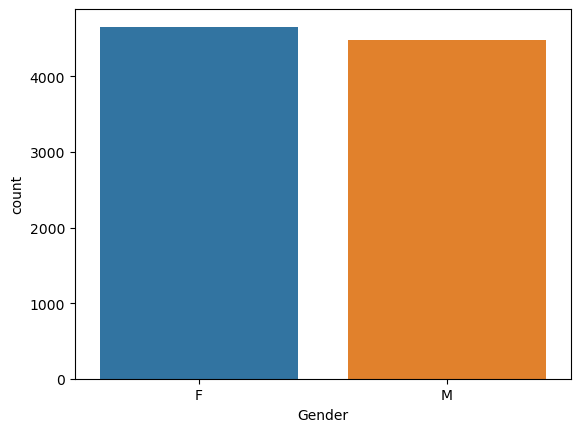

In [46]:
sns.countplot(data=df,x="Gender")
plt.show()

### Location Code

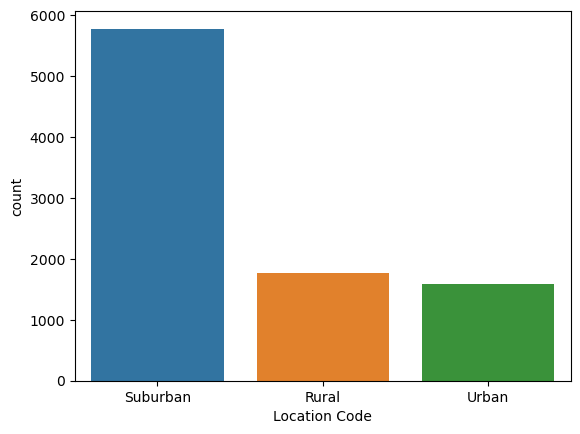

In [47]:
sns.countplot(data=df,x="Location Code")
plt.show()

### Marital Status

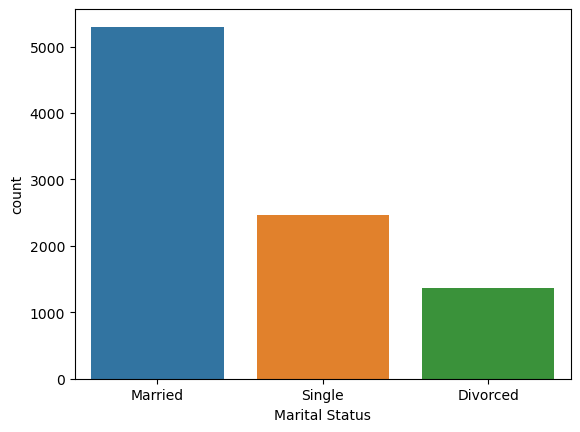

In [48]:
sns.countplot(data=df,x="Marital Status")
plt.show()

### Policy Type

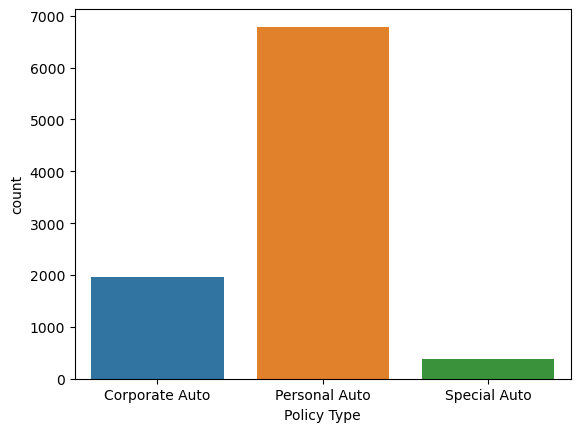

In [49]:
sns.countplot(data=df, x="Policy Type")
plt.show()

### Policy

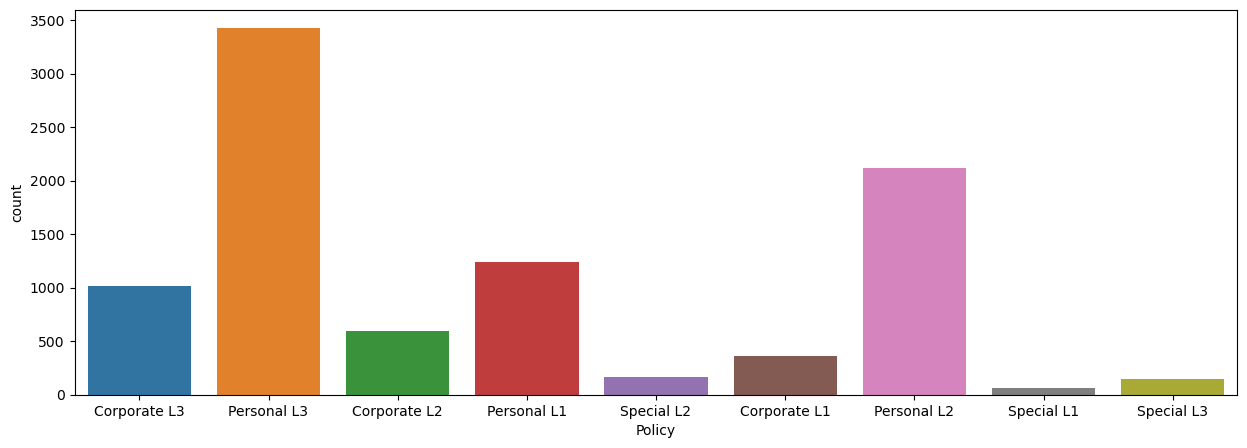

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x="Policy")
plt.show()

Personal L3 policy subcategory has the most number of customers

### Renew Offer type

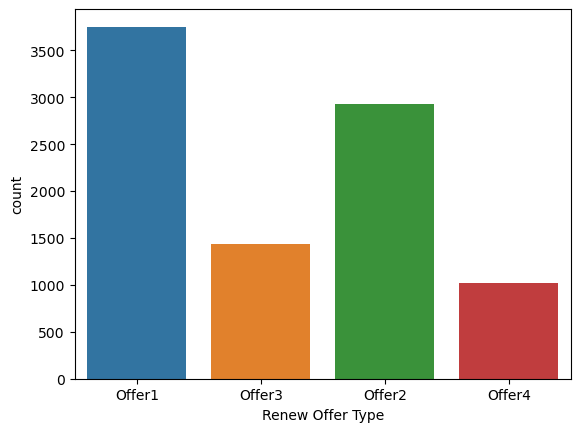

In [51]:
sns.countplot(data=df,x="Renew Offer Type")
plt.show()

### Sales Channel

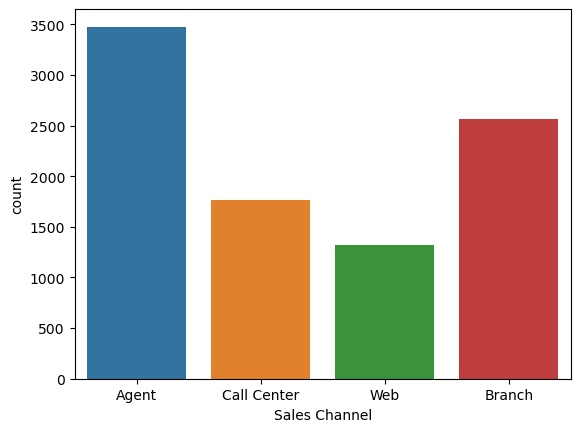

In [52]:
sns.countplot(data=df,x="Sales Channel")
plt.show()

### Vehicle Class

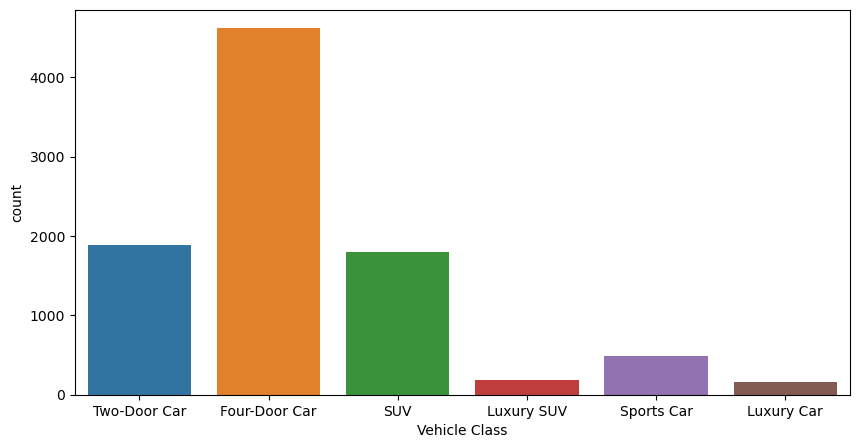

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="Vehicle Class")
plt.show()

### Vehicle Size

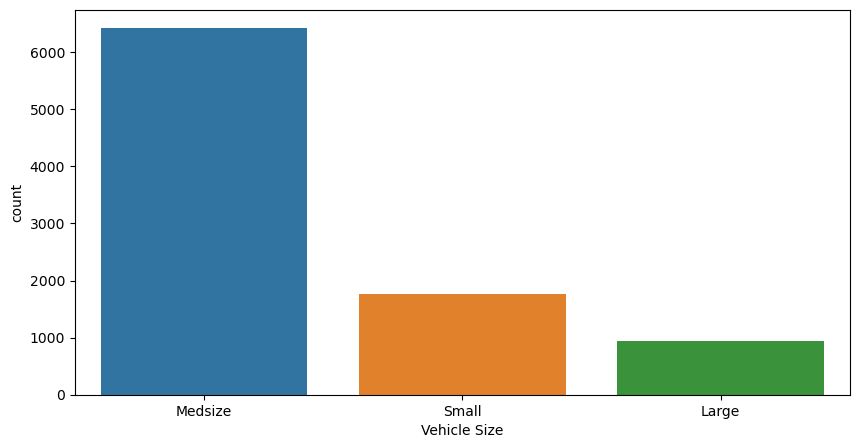

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="Vehicle Size")
plt.show()

### Number of Open Complaints

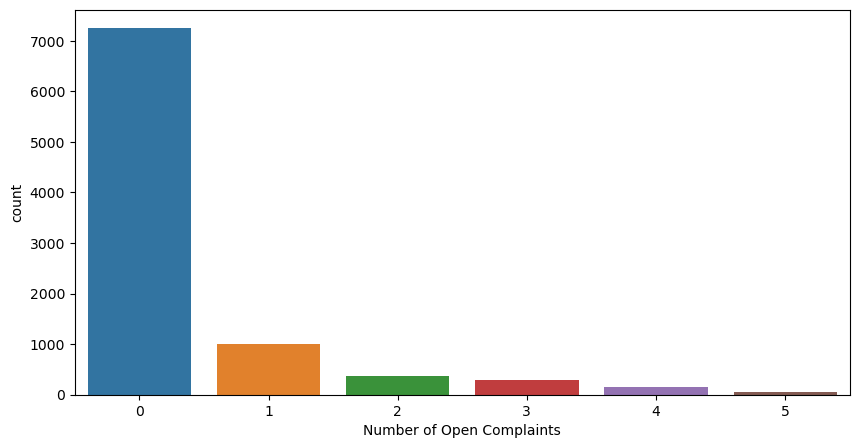

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Number of Open Complaints")
plt.show()

### Number of Policies

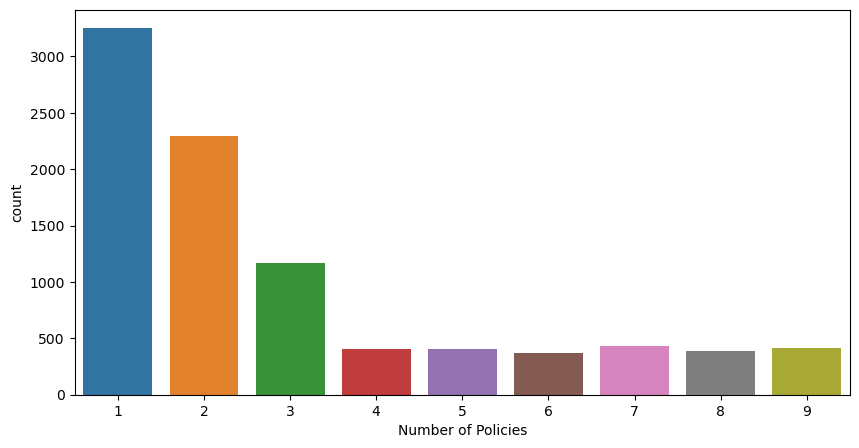

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="Number of Policies")
plt.show()

In [57]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'],infer_datetime_format=True)

In [58]:
df["Months"] = df["Effective To Date"].dt.month

In [59]:
df['Months'] = df['Months'].astype('object')

### Months

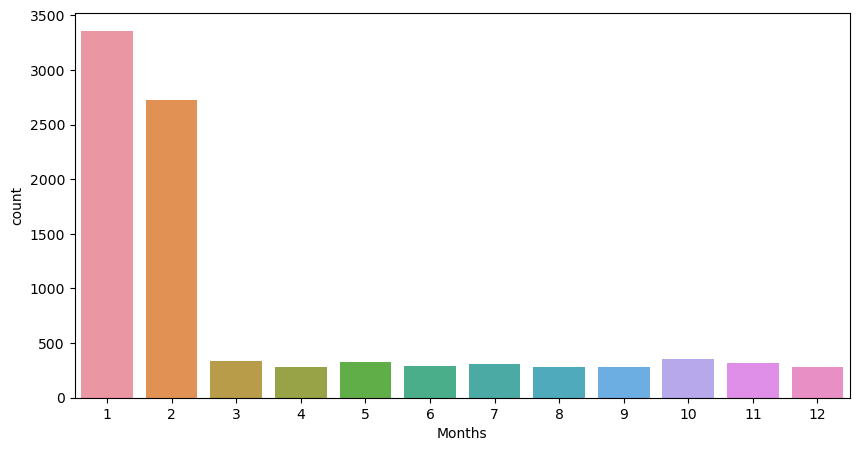

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Months")
plt.show()

In [61]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Policies',
       'Number of Open Complaints'],
      dtype='object')

In [62]:
df.columns

Index(['Customer', 'State', 'CLV', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Months'],
      dtype='object')

## HeatMap

In [63]:
heatmap = df[['CLV', 'Income', 'Monthly Premium Auto','Total Claim Amount']]

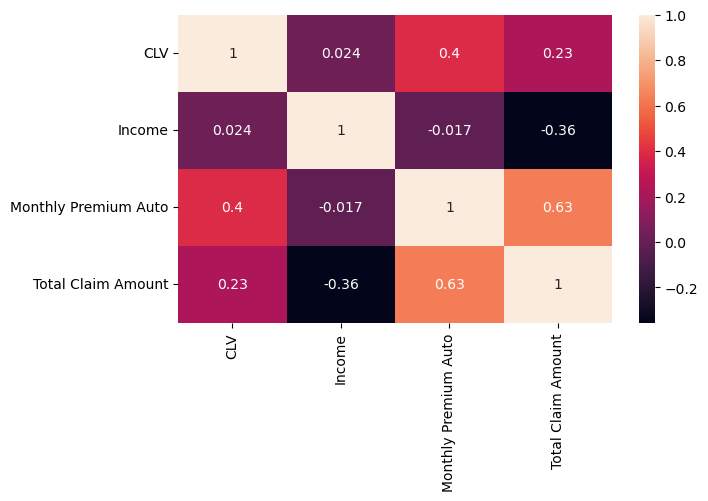

In [64]:
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
plt.show()

We can clearly see in the heatmap, that customer lifetime value has a better correlation with monthly premium auto and acceptable correlation with total claim amount.


## Statistical Significance

### Chi-Square test

Checking if Education depends on gender

##### Null Hypotheses: Gender and Education are independent of each other.
##### Alternate Hypotheses: Gender and Education interdependent.

In [65]:
tab1 = pd.crosstab(index = df['Education'], columns = df['Gender'])
tab1

Gender,F,M
Education,,
Bachelor,1423,1325
College,1352,1329
Doctor,169,173
High School or Below,1321,1301
Master,393,348


In [66]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)

(2.9990923685181614,
 0.5579773018261031,
 4,
 array([[1401.37770966, 1346.62229034],
        [1367.21020363, 1313.78979637],
        [ 174.40726954,  167.59273046],
        [1337.12239982, 1284.87760018],
        [ 377.88241734,  363.11758266]]))

##### as the p-value is greater then 0.05, we accept the null hypothesis, so Gender and Education are independent of each other

Checking if Employement Status depends on State

##### Null Hypotheses: Employment Status and State are independent of each other.
##### Alternate Hypotheses:  Employment Status and State are interdependent.

In [68]:
tab1 = pd.crosstab(index = df['State'], columns = df['EmploymentStatus'])
tab1

EmploymentStatus,Disabled,Employed,Medical Leave,Retired,Unemployed
State,,,,,
Arizona,84,1061,80,48,430
California,131,1957,151,107,804
Nevada,39,556,45,25,217
Oregon,120,1621,118,78,664
Washington,31,503,38,24,202


In [69]:
chi2_contingency(tab1)

(4.783643748098279,
 0.9967283699758681,
 16,
 array([[  75.51072914, 1062.37070287,   80.54477775,   52.57784103,
          431.9959492 ],
        [ 139.67046201, 1965.04269761,  148.98182614,   97.2520254 ,
          799.05298883],
        [  39.10772936,  550.21195533,   41.71491132,   27.23056711,
          223.73483687],
        [ 115.32789577, 1622.56382746,  123.01642216,   80.30238669,
          659.78946792],
        [  35.38318371,  497.81081673,   37.74206262,   24.63717977,
          202.42675717]]))

##### as the p-value is greater then 0.05, we accept the null hypothesis, so Employment Status and State are independent of each other

Checking if Coverage depends on Vehicle Class

##### Null Hypotheses: Vehicle Class and Coverage are independent of each other.
##### Alternate Hypotheses:  Vehicle Class and Coverage are interdependent.

In [70]:
tab1 = pd.crosstab(index = df['Vehicle Class'], columns = df['Coverage'])
tab1

Coverage,Basic,Extended,Premium
Vehicle Class,,,
Four-Door Car,2795,1403,423
Luxury Car,92,49,22
Luxury SUV,94,64,26
SUV,1117,529,150
Sports Car,292,145,47
Two-Door Car,1178,552,156


In [71]:
chi2_contingency(tab1)

(18.308467992846534,
 0.04997786810554786,
 10,
 array([[2816.91788921, 1387.21064156,  416.87146924],
        [  99.36325816,   48.93212174,   14.7046201 ],
        [ 112.16465951,   55.23626013,   16.59908036],
        [1094.82461134,  539.15393037,  162.02145829],
        [ 295.04182176,  145.2953799 ,   43.66279834],
        [1149.68776002,  566.1716663 ,  170.14057368]]))

##### as the p-value is less then 0.05, we reject the null hypothesis, so Vehicle Class and Coverage are independent of each other

Checking if Policy type depends on Vehicle Class

##### Null Hypotheses: Pplicy type and Vehicle Class are independent of each other.
##### Alternate Hypotheses:  Policy type and Vehicle Class are interdependent.

In [72]:
tab1 = pd.crosstab(index = df['Vehicle Class'], columns = df['Policy Type'])
tab1

Policy Type,Corporate Auto,Personal Auto,Special Auto
Vehicle Class,,,
Four-Door Car,991,3433,197
Luxury Car,40,116,7
Luxury SUV,32,146,6
SUV,393,1329,74
Sports Car,104,355,25
Two-Door Car,408,1409,69


In [73]:
chi2_contingency(tab1)

(6.054828848773706,
 0.8106359070452108,
 10,
 array([[ 995.63477118, 3434.13050142,  191.23472739],
        [  35.11977228,  121.1346617 ,    6.74556602],
        [  39.64440552,  136.74096781,    7.61462667],
        [ 386.96387125, 1334.71075104,   74.32537771],
        [ 104.28202321,  359.68819794,   20.02977885],
        [ 406.35515656, 1401.59492008,   78.04992336]]))

##### as the p-value is greater then 0.05, we accept the null hypothesis, so Policy type and Vehicle Class are independent of each other

Checking if Employment Status depends on Education

##### Null Hypotheses: Employment Status and Education are independent of each other.
##### Alternate Hypotheses:  Employment Status and Education are interdependent.

In [76]:
tab1 = pd.crosstab(index = df['EmploymentStatus'], columns = df['Education'])
tab1

Education,Bachelor,College,Doctor,High School or Below,Master
EmploymentStatus,,,,,
Disabled,121,98,22,118,46
Employed,1702,1664,249,1528,555
Medical Leave,126,145,17,115,29
Retired,88,102,1,72,19
Unemployed,711,672,53,789,92


In [77]:
chi2_contingency(tab1)

(148.75779422284393,
 1.3729369098070577e-23,
 16,
 array([[ 121.84585067,  118.87508211,   15.16422159,  116.25903219,
           32.85581344],
        [1714.26582001, 1672.46967375,  213.34749288, 1635.66411211,
          462.25290125],
        [ 129.96890738,  126.80008758,   16.1751697 ,  124.00963433,
           35.04620101],
        [  84.84081454,   82.7722794 ,   10.55879133,   80.95073352,
           22.87738121],
        [ 697.0786074 ,  680.08287716,   86.7543245 ,  665.11648785,
          187.96770309]]))

##### as the p-value is greater then 0.05, we accept the null hypothesis, so Current employment status and Education are independent of each other

Checking if Coverage depends on Vehicle size

##### Null Hypotheses: Coverage and Vehicle Size are independent of each other.
##### Alternate Hypotheses:  Coverage and Vehicle Size are interdependent.

In [78]:
tab1 = pd.crosstab(index = df['Coverage'], columns = df['Vehicle Size'])
tab1

Vehicle Size,Large,Medsize,Small
Coverage,,,
Basic,568,3912,1088
Extended,305,1917,520
Premium,73,595,156


In [79]:
chi2_contingency(tab1)

(4.3389171544902805,
 0.3620772110287006,
 4,
 array([[ 576.67265163, 3916.00963433, 1075.31771404],
        [ 283.98642435, 1928.46595139,  529.54762426],
        [  85.34092402,  579.52441428,  159.1346617 ]]))

##### as the p-value is greater then 0.05, we accept the null hypothesis, so Vehicle size and Coverage are independent of each other

Checking if Coverage depends on Sales Channel

##### Null Hypotheses: Coverage and Sales Channel are independent of each other.
##### Alternate Hypotheses:  Coverage and Sales Channel are interdependent.

In [80]:
tab1 = pd.crosstab(index = df['Coverage'], columns = df['Sales Channel'])
tab1

Sales Channel,Agent,Branch,Call Center,Web
Coverage,,,,
Basic,2069,1544,1104,851
Extended,1099,785,508,350
Premium,309,238,153,124


In [81]:
chi2_contingency(tab1)

(15.018893088254325,
 0.020110277243845478,
 6,
 array([[2119.54631049, 1564.81891833, 1075.92730458,  807.70746661],
        [1043.78519816,  770.60586818,  529.84782133,  397.76111233],
        [ 313.66849135,  231.57521349,  159.2248741 ,  119.53142106]]))

##### as the p-value is less then 0.05, we reject the null hypothesis, so Sales Channel and Coverage are independent of each other

Checking if Policy type depends on Sales Channel

##### Null Hypotheses: Policy type and Sales Channel are independent of each other.
##### Alternate Hypotheses:  Policy type and Sales Channel are interdependent.

In [82]:
tab1 = pd.crosstab(index = df['Policy Type'], columns = df['Sales Channel'])
tab1

Sales Channel,Agent,Branch,Call Center,Web
Policy Type,,,,
Corporate Auto,752,553,378,285
Personal Auto,2575,1906,1329,978
Special Auto,150,108,58,62


In [83]:
chi2_contingency(tab1)

(4.655398517151223,
 0.5887070133364456,
 6,
 array([[ 749.14998905,  553.08254872,  380.28465076,  285.48281147],
        [2583.9583972 , 1907.68513247, 1311.67287059,  984.68359974],
        [ 143.89161375,  106.23231881,   73.04247865,   54.83358879]]))

##### as the p-value is greater then 0.05, we accept the null hypothesis, so Sales Channel and Policy type are independent of each other

Checking if Coverage depends on Policy

##### Null Hypotheses: Policy  and Coverage are independent of each other.
##### Alternate Hypotheses:  Policy and Coverage are interdependent.

In [84]:
tab1 = pd.crosstab(index = df['Policy'], columns = df['Coverage'])
tab1

Coverage,Basic,Extended,Premium
Policy,,,
Corporate L1,222,101,36
Corporate L2,338,192,65
Corporate L3,645,289,80
Personal L1,754,386,100
Personal L2,1303,613,206
Personal L3,2081,1039,306
Special L1,38,22,6
Special L2,92,57,15
Special L3,95,43,10


In [85]:
chi2_contingency(tab1)

(16.72563382736633,
 0.40356234291044246,
 16,
 array([[ 218.84300416,  107.77074666,   32.38624918],
        [ 362.7063718 ,  178.61725422,   53.67637399],
        [ 618.12480841,  304.39982483,   91.47536676],
        [ 755.89227064,  372.24436173,  111.86336764],
        [1293.55112765,  637.01817386,  191.43069849],
        [2088.45719291, 1028.4751478 ,  309.06765929],
        [  40.2329757 ,   19.81300635,    5.95401795],
        [  99.9728487 ,   49.23231881,   14.79483249],
        [  90.21940004,   44.42916575,   13.3514342 ]]))

##### as the p-value is greater then 0.05, we accept the null hypothesis, so Coverage and Policy  are independent of each other

In [88]:
columns_cat = list(cat_cols.columns)
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Policies',
 'Number of Open Complaints']

In [89]:
ttest = []
anova = []

for i in columns_cat:
    if (df[i].nunique()>2):
        anova.append(i)
    else:
        ttest.append(i)
print("Anova:",anova)
print("TTest:",ttest)

Anova: ['Customer', 'State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Number of Policies', 'Number of Open Complaints']
TTest: ['Response', 'Gender']


### T-test

H0: The null hypothesis states that there is no significant difference between the means of the two independent groups

H1: The alternative hypothesis suggests that there is a significant difference between the means of the two independent groups.

##### Response

In [92]:
no=df[df['Response']=='No']['CLV']
yes=df[df['Response']=='Yes']['CLV']

<AxesSubplot: xlabel='CLV', ylabel='Density'>

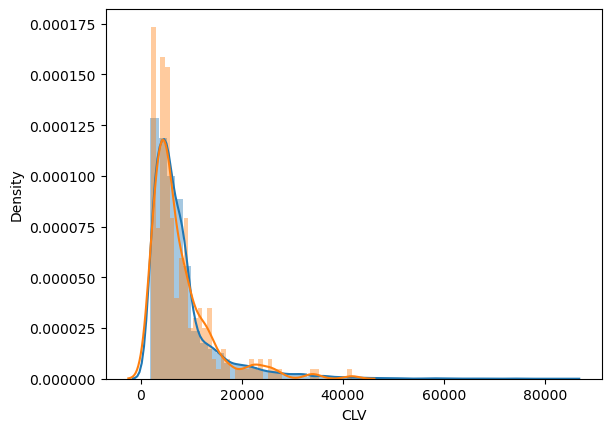

In [93]:
sns.distplot(no)
sns.distplot(yes)

In [94]:
from scipy.stats import ttest_ind

# Conduct the t-test
t_statistic, p_value = ttest_ind(no, yes)

# Print the results
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: 0.8533582829612565
p-value: 0.393483030479461


The p-value exceeding 0.05 suggests that we do not have sufficient evidence to reject the null hypothesis. This indicates that there is no significant difference in the mean of customer lifetime values (CLV) between the group of customers who responded positively and the group who responded negatively. Therefore, we conclude that there is no statistically significant distinction in CLV values between the two groups.

##### Gender

In [95]:
m=df[df['Gender']=='M']['CLV']
f=df[df['Gender']=='F']['CLV']

In [96]:
# Conduct the t-test
t_statistic, p_value = ttest_ind(m, f)

# Print the results
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -1.300686352501256
p-value: 0.19339865630769232


p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean is same for both males and females.

After conducting independent t-test on the two features, we have determined that they are not statistically significant predictors of the target variable

### Anova test

- H0:The null hypothesis states that there is no significant difference in the means of the CLV among the different groups.
- H1:Atleast one group has significant difference in mean from others

##### State

In [98]:
cal=df[df['State']=='California']['CLV']
Ore=df[df['State']=='Oregon']['CLV']
Ari=df[df['State']=='Arizona']['CLV']
Nev=df[df['State']=='Nevada']['CLV']
Was=df[df['State']=='Washington']['CLV']

In [100]:
from scipy.stats import f_oneway
# Conduct the ANOVA
F, p_value = f_oneway(cal, Ore, Ari, Nev, Was)

# Print the results
print('F-statistic:', F)
print('p-value:', p_value)

F-statistic: 0.272892854621193
p-value: 0.8955985932127517


p-value > 0.05 , we failed to reject H0

##### Coverage

In [101]:
from scipy.stats import f_oneway

# Create the dataframes
bas = df[df['Coverage'] == 'Basic']['CLV']
ext = df[df['Coverage'] == 'Extended']['CLV']
pre = df[df['Coverage'] == 'Premium']['CLV']

# Conduct the ANOVA
F, p_value = f_oneway(bas, ext, pre)

# Print the results
print('F-statistic:', F)
print('p-value:', p_value)

F-statistic: 133.67511419504905
p-value: 6.0158970099807e-58


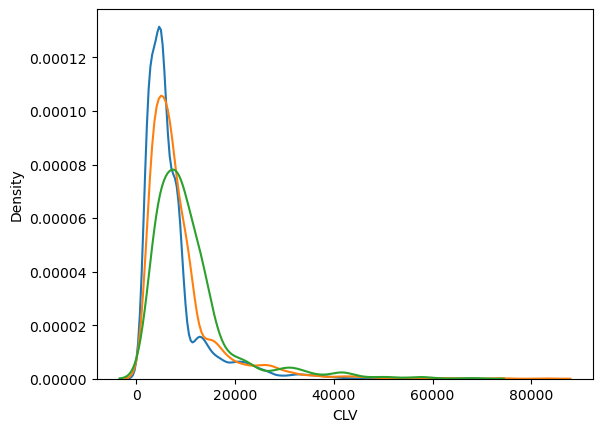

In [75]:
sns.distplot(Bas,hist=False)
sns.distplot(Ext,hist=False)
sns.distplot(Pre,hist=False)
plt.show()

p-value is significant (p<0.05), hence H0 is rejected. So Coverage is statistically significant in predicting CLV

##### Education

In [104]:
# Separate the data for each group
Bac = df[df['Education'] == 'Bachelor']['CLV']
Col = df[df['Education'] == 'College']['CLV']
Hig = df[df['Education'] == 'High School or Below']['CLV']
Mas = df[df['Education'] == 'Master']['CLV']
Doc = df[df['Education'] == 'Doctor']['CLV']

# Perform ANOVA
f_statistic, p_value = f_oneway(Bac, Col, Hig, Mas, Doc)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 2.422865348052191
p-value: 0.04603615409468821


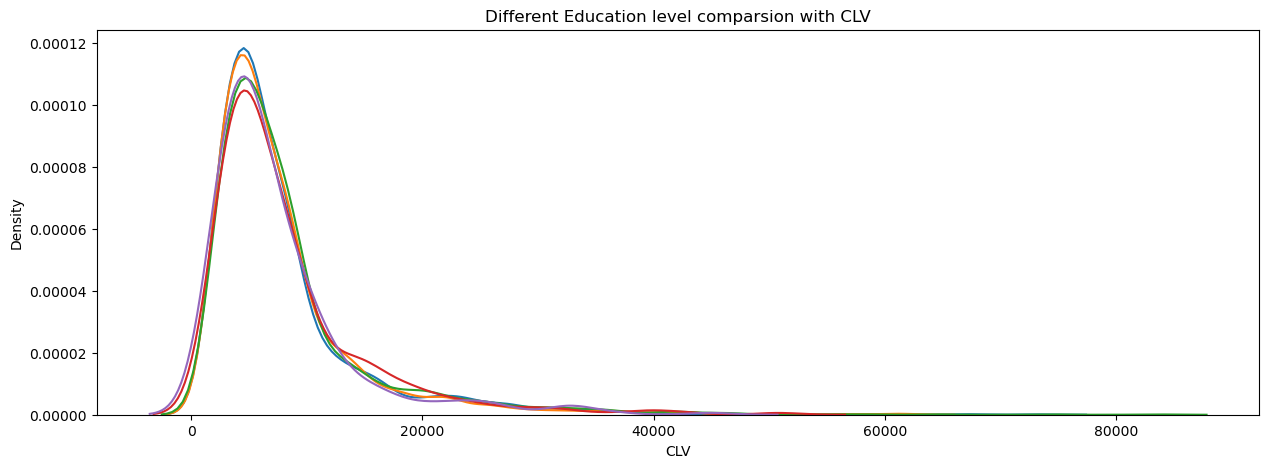

In [79]:
plt.figure(figsize=(15,5))
sns.distplot(Bac,hist=False,label='Bachelor')
sns.distplot(Col,hist=False,label='College')
sns.distplot(Hig,hist=False,label='High School or Below')
sns.distplot(Mas,hist=False,label='Master')
sns.distplot(Doc,hist=False,label='Doctor')
plt.title("Different Education level comparsion with CLV")
plt.show()

p-value is significant (p<0.05), hence H0 is rejected. So Education is statistically significant in predicting CLV

##### Employment Status

In [103]:
# Separate the data for each group
E = df[df['EmploymentStatus'] == 'Employed']['CLV']
U = df[df['EmploymentStatus'] == 'Unemployed']['CLV']
M = df[df['EmploymentStatus'] == 'Medical Leave']['CLV']
D = df[df['EmploymentStatus'] == 'Disabled']['CLV']
R = df[df['EmploymentStatus'] == 'Retired']['CLV']

# Perform ANOVA
f_statistic, p_value = f_oneway(E, U, M, D, R)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 3.8098087103286047
p-value: 0.00425058662383102


p-value is significant (p<0.05), hence H0 is rejected. So EmploymentStatus is statistically significant in predicting CLV

##### Location Code

In [108]:
# Separate the data for each group
Su = df[df['Location Code'] == 'Suburban']['CLV']
Ru = df[df['Location Code'] == 'Rural']['CLV']
Ur = df[df['Location Code'] == 'Urban']['CLV']

# Perform ANOVA
f_statistic, p_value = f_oneway(Su, Ru, Ur)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 0.10800210605345349
p-value: 0.8976268526407198


p-value > 0.05 reject H0, Location Code is statistically significant in predicting CLV

##### Marital Status

In [109]:
# Separate the data for each group
Ma = df[df['Marital Status'] == 'Married']['CLV']
Si = df[df['Marital Status'] == 'Single']['CLV']
Di = df[df['Marital Status'] == 'Divorced']['CLV']

# Perform ANOVA
f_statistic, p_value = f_oneway(Ma, Si, Di)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 3.317664937589137
p-value: 0.036281036735873


p-value < 0.05 reject H0, Marital Status can be significant in predicting CLV

##### Number of Open Complaints

In [105]:
# Separate the data for each group
A = df[df['Number of Open Complaints'] == 0]['CLV']
B = df[df['Number of Open Complaints'] == 1]['CLV']
C = df[df['Number of Open Complaints'] == 2]['CLV']
D = df[df['Number of Open Complaints'] == 3]['CLV']
E = df[df['Number of Open Complaints'] == 4]['CLV']
F = df[df['Number of Open Complaints'] == 5]['CLV']

# Perform ANOVA
f_statistic, p_value = f_oneway(A, B, C, D, E, F)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 4.436417365088408
p-value: 0.0004884204153965216


p-value < 0.05 reject H0, Number of Open Complaints can be significant in predicting CLV

##### Number of Policies

In [106]:
# Separate the data for each group
A = df[df['Number of Policies'] == 1]['CLV']
B = df[df['Number of Policies'] == 2]['CLV']
C = df[df['Number of Policies'] == 3]['CLV']

# Perform ANOVA
f_statistic, p_value = f_oneway(A, B, C)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 3175.776145846316
p-value: 0.0


p-value < 0.05 reject H0, Number of Policies is statistically significant in predicting CLV

##### Policy Type

In [110]:
# Separate the data for each group
Pe = df[df['Policy Type'] == 'Personal Auto']['CLV']
Co = df[df['Policy Type'] == 'Corporate Auto']['CLV']
Sp = df[df['Policy Type'] == 'Special Auto']['CLV']

# Perform ANOVA
f_statistic, p_value = f_oneway(Pe, Co, Sp)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 2.183644634048656
p-value: 0.11268909882175004


p-value > 0.05 failed to reject H0, Policy Type is not statistically significant in predicting CLV

##### Policy

In [107]:
# Separate the data for each group
P3 = df[df['Policy'] == 'Personal L3']['CLV']
P2 = df[df['Policy'] == 'Personal L2']['CLV']
L1 = df[df['Policy'] == 'Personal L1']['CLV']
C3 = df[df['Policy'] == 'Corporate L3']['CLV']
C2 = df[df['Policy'] == 'Corporate L2']['CLV']
C1 = df[df['Policy'] == 'Corporate L1']['CLV']
S2 = df[df['Policy'] == 'Special L2']['CLV']
S3 = df[df['Policy'] == 'Special L3']['CLV']
S1 = df[df['Policy'] == 'Special L1']['CLV']

# Perform ANOVA
f_statistic, p_value = f_oneway(P3, P2, L1, C3, C2, C1, S2, S3, S1)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 1.1839990669675131
p-value: 0.3041951364145143


p-value > 0.05 failed to reject H0, Policy is not statistically significant in predicting CLV

##### Renew Offer Type

In [111]:
# Separate the data for each group
O1 = df[df['Renew Offer Type'] == 'Offer1']['CLV']
O2 = df[df['Renew Offer Type'] == 'Offer2']['CLV']
O3 = df[df['Renew Offer Type'] == 'Offer3']['CLV']
O4 = df[df['Renew Offer Type'] == 'Offer4']['CLV']

# Perform ANOVA
f_statistic, p_value = f_oneway(O1, O2, O3, O4)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 25.832614444940408
p-value: 1.238399930571374e-16


p-value < 0.05 reject H0, Number of Policies is statistically significant in predicting CLV

##### Sales Channel

In [112]:
# Separate the data for each group
A = df[df['Sales Channel'] == 'Agent']['CLV']
B = df[df['Sales Channel'] == 'Branch']['CLV']
C = df[df['Sales Channel'] == 'Call Center']['CLV']
W = df[df['Sales Channel'] == 'Web']['CLV']

# Perform ANOVA
f_statistic, p_value = f_oneway(A, B, C, W)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 0.880545478527625
p-value: 0.4502779502550758


p-value > 0.05 failed to reject H0, Sales Channel is not significant in predicting CLV

##### Vehicle Class

In [113]:
# Separate the data for each group
F = df[df['Vehicle Class'] == 'Four-Door Car']['CLV']
T = df[df['Vehicle Class'] == 'Two-Door Car']['CLV']
S = df[df['Vehicle Class'] == 'SUV']['CLV']
Sp = df[df['Vehicle Class'] == 'Sports Car']['CLV']
Ls = df[df['Vehicle Class'] == 'Luxury SUV']['CLV']
Lc = df[df['Vehicle Class'] == 'Luxury Car']['CLV']

# Perform ANOVA
f_statistic, p_value = f_oneway(F, T, S, Sp, Ls, Lc)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 267.15811680243496
p-value: 2.085525760212929e-267


p-value < 0.05 reject H0, Vehicle Class is statistically significant in predicting CLV

In [102]:
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Policies',
 'Number of Open Complaints']

In [103]:
cat_cols.drop("Customer",axis=1,inplace=True)

In [104]:
cat_cols

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Policies,Number of Open Complaints
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,1,0
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,8,0
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2,0
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,7,0
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,2,0
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,1,0
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,2,3
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,3,0


In [105]:
p_values = [a[1],b[1],c[1],d[1],e[1],f[1],g[1],h[1],i[1],j[1],k[1],l[1],m[1],n[1],o[1],p[1]]

In [106]:
p_values

[0.27998232358818953,
 0.48749303056449833,
 7.648852917746348e-110,
 0.015693004298603028,
 1.2758458797542519e-08,
 6979.535903,
 0.29173464205664124,
 2.9009146434700455e-05,
 0.0998836452694168,
 0.4389248352544014,
 2.196144881912684e-36,
 0.2130272157209903,
 3.309676344717952e-281,
 0.00837505335446059,
 2.1564409504417123e-05,
 0.0]

In [107]:
len(p_values)

16

In [108]:
len(cat_cols.columns)

16

In [109]:
pd.DataFrame(p_values,index=(cat_cols.columns),columns=['P_Value'])

,P_Value
State,2.799823e-01
Response,4.874930e-01
Coverage,7.648853e-110
Education,1.569300e-02
EmploymentStatus,1.275846e-08
Gender,6.979536e+03
Location Code,2.917346e-01
Marital Status,2.900915e-05
Policy Type,9.988365e-02
Policy,4.389248e-01


Coverage,Education,EmploymentStatus,Marital Status, Renew Offer Type, Vehicle class, Vehicle size, Number of open complaints and No of Policies play a significant role in predicting the CLV

In [110]:
num_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [111]:
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Policies,Number of Open Complaints
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,1,0
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,8,0
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2,0
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,7,0
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,1,0


### Data Preprocessing

In [112]:
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Policies,Number of Open Complaints
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,1,0
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,8,0
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2,0
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,7,0
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,1,0


In [113]:
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   State                      9134 non-null   object
 1   Response                   9134 non-null   object
 2   Coverage                   9134 non-null   object
 3   Education                  9134 non-null   object
 4   EmploymentStatus           9134 non-null   object
 5   Gender                     9134 non-null   object
 6   Location Code              9134 non-null   object
 7   Marital Status             9134 non-null   object
 8   Policy Type                9134 non-null   object
 9   Policy                     9134 non-null   object
 10  Renew Offer Type           9134 non-null   object
 11  Sales Channel              9134 non-null   object
 12  Vehicle Class              9134 non-null   object
 13  Vehicle Size               9134 non-null   object
 14  Number o

In [114]:
cat1=pd.get_dummies(cat_cols,drop_first=True)

In [115]:
cat1.head()

,Number of Policies,Number of Open Complaints,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,8,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,7,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [116]:
num_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [117]:
df1 = pd.concat([num_cols,cat1],axis=1)
df1.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Policies,Number of Open Complaints,State_California,State_Nevada,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,384.811147,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,1131.464935,8,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,566.472247,2,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,529.881344,7,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,138.130879,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## OLS Model

In [118]:
X=df1.drop(['CLV'],axis=1)
y=df1['CLV']
X_constant=sm.add_constant(X)
lin_reg=sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     38.60
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          6.92e-323
Time:                        00:19:41   Log-Likelihood:                -92812.
No. Observations:                9134   AIC:                         1.857e+05
Df Residuals:                    9085   BIC:                         1.861e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1486.6386    903.661      1.645      0.100    -284.740    3258.017
Income                            -0.0012      0.004     -0.307      0.759      -0.009       0.006
Monthly Premium Auto              69.5779     10.026      6.940      0.000      49.926      89.230
Months Since Last Claim            7.0626      6.554      1.078      0.281      -5.785      19.911
Months Since Policy Inception     -1.3200      2.380     -0.555      0.579      -5.985       3.345
Total Claim Amount                -0.2268      0.474     -0.478      0.632      -1.156       0.703
Number of Policies                57.7126     27.753      2.080      0.038       3.311     112.114
Number of Open Complaints       -264.2647     72.496     -3.645      0.000    -406.373    -122.157
State_California                  39.9647    189.426      0.211      0.833    -331.354     411.283
State_Nevada                      45.7021    261.160      0.175      0.861    -466.231     557.635
State_Oregon                      84.9912    196.050      0.434      0.665    -299.312     469.294
State_Washington                 164.3324    269.980      0.609      0.543    -364.888     693.553
Response_Yes                    -215.9162    207.436     -1.041      0.298    -622.538     190.705
Coverage_Extended                130.1678    249.287      0.522      0.602    -358.490     618.826
Coverage_Premium                  61.7491    527.605      0.117      0.907    -972.476    1095.974
Education_College                 -1.5962    171.219     -0.009      0.993    -337.225     334.032
Education_Doctor                -197.9744    362.976     -0.545      0.585    -909.488     513.540
Education_High School or Below   388.9735    173.415      2.243      0.025      49.041     728.906
Education_Master                 157.9503    262.899      0.601      0.548    -357.390     673.291
EmploymentStatus_Employed        700.4418    354.477      1.976      0.048       5.587    1395.296
EmploymentStatus_Medical Leave   210.8226    436.143      0.483      0.629    -644.116    1065.761
EmploymentStatus_Retired          64.6393    502.732      0.129      0.898    -920.829    1050.108
EmploymentStatus_Unemployed        9.1563    357.613      0.026      0.980    -691.846     710.158
Gender_M                        -143.5239    132.973     -1.079      0.280    -404.181     117.133
Location Code_Suburban           -73.7895    263.381     -0.280      0.779    -590.076     442.497
Location Code_Urban              128.8756    241.416      0.534      0.593    -344.355     602.106
Marital Status_Married          -177.6388    194.800     -0.912      0.362    -559.490     204.212
Marital Status_Single           -490.7108    225.714     -2.174      0.030    -933.161     -48.260
Policy Type_Pe

## Assumptions
1. No autocorrelation in residuals
2. Linearity 
3. Normality of error terms
4. No Heteroscedacity - Constant variance of error terms
5. No strong MultiCollinearity among independent variables

**Assumption 1 No Auto correlation.**

Test needed : **Durbin- Watson Test**

 The value of the Durbin-Watson statistic ranges from 0 to 4.When its value is between 0 and 2, it indicates positive autocorrelation. 
When the Durbin-Watson value is between 2 and 4, it indicates negative autocorrelation. 
If the value is exactly 2, it suggests No Autocorrelation.
For a good linear model, it should have low or no autocorrelation.
we can see here the values of dublin watson test: **1.995** (No AUTO-CORRELATION)

From the graph below, we can easily see that there is no autocorrelation.

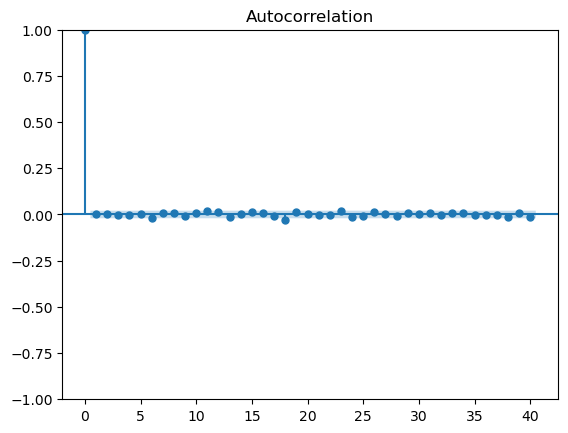

In [119]:
 #timeseries analysis

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)#auto_correlation value, lags= previous value
acf.show()

**Assumption 2- Normality of Residuals**

The Jarque-Bera test is commonly used to assess whether the residuals of a model follow a normal distribution. In a good model, the residuals should exhibit normality. A lower value of the Jarque-Bera test is generally preferred, indicating a closer match between the residuals' skewness, kurtosis, and a normal distribution.

The Jarque-Bera test examines the skewness and kurtosis of the sample data to determine if they align with those of a normal distribution. A large Jarque-Bera test value suggests non-normality in the data.

It is important to note that the Jarque-Bera test tends to perform well when the sample size is sufficiently large, typically greater than 2000. In such cases, the test statistic asymptotically follows a chi-squared distribution with 2 degrees of freedom.

The null hypothesis (H0) in the Jarque-Bera test states that the error terms (residuals) are normally distributed. The degrees of freedom for the residuals are equal to the sample size minus 2 (dof = n - 2).

In [120]:
print(stats.jarque_bera(lin_reg.resid))

Jarque_beraResult(statistic=65051.5452413823, pvalue=0.0)


The critical chi square value at the 5% level of significance is 5.99. If the computed value exceeds this value the null hypothesis is rejected.
In this case the computed value of the JB statistic 65051.11 is greater than 5.99. Thus **we reject the null hypothesis that the error terms are normally distributed.**

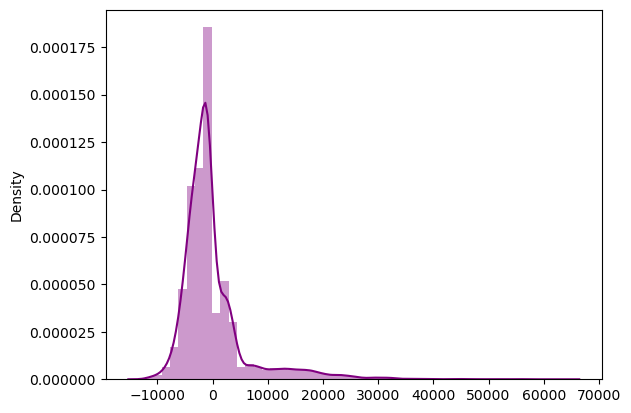

In [121]:
sns.distplot(lin_reg.resid,color='purple')
plt.show()

From the graph we infer that due to the high value of Jarque Bera test, only few residuals are normally distributed

**Asssumption 3 - Linearity**

Here we have 2 options. Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals. OR We can go for **rainbow test**. Let's look both of them one by one.

The Rainbow test examines the residuals of the regression model and tests if there is any remaining systematic pattern or curvature in the relationship that is not captured by the linear model

In [122]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5) #the fraction of the data to include in the center model

(1.0164972729968935, 0.2907128743692436)

H0:The relationship is linear between dependent and independent variables
pvalue > 0.05 so we failed to reject H0, hence **residuals are normally distributed and relationship is linear**

In [123]:
lin_reg.resid.mean()

1.6529312939185539e-09

**Assumption 4 - Homoscedasticity_test(using Goldfeld-Quandt test)**

Homoscedacity :: If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

Heteroscedacity :: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

This test is based on the hypothesis testing where null and alternate hypothesis are:               
**𝐻0:** 𝜎𝑢𝑖 𝑖𝑠 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎
**𝐻𝑎:** 𝜎𝑢𝑖 𝑖𝑠 𝑛𝑜𝑡 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎
The residuals should be homoscedastic.

**Goldfeld-Quandt Test**

In [124]:
import statsmodels.stats.api as sms

In [125]:
name=['F-statistic','p-value']
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

test

(1.2289680194898225, 2.216740369946362e-12, 'increasing')

 p-value below a certain level (like 0.05) indicates we should **reject the null hypothesis in favor of heteroscedasticity.**

**Assumption 5- No Multi Collinearity**

The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
Income,3.183923
Monthly Premium Auto,27.569851
Months Since Last Claim,1.009934
Months Since Policy Inception,1.022048
Total Claim Amount,4.396905
Number of Policies,1.019460
Number of Open Complaints,1.009196
State_California,1.878492
State_Nevada,1.378696
State_Oregon,1.813907


Due to the high variance inflation factor (VIF) observed in the "Policy" and "Policy Type" columns, as well as their lack of statistical significance in predicting CLV, we can conclude that these variables can be removed from the analysis.

##### Applying Box-Cox transformation

In [127]:
# Performing Box-Cox transformation on the target variable
y_transformed, lambda_ = stats.boxcox(y)

##### FEATURE SELECTION
**Droping features with very high VIF**

In [128]:
X=df1.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y = y_transformed

In [129]:
# Feature Selection by Recursive Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    Xc = sm.add_constant(X)
    model = sm.OLS(y,Xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['Monthly Premium Auto', 'Number of Policies', 'Number of Open Complaints', 'Coverage_Extended', 'Coverage_Premium', 'Education_High School or Below', 'EmploymentStatus_Employed', 'Marital Status_Single', 'Policy_Corporate L2', 'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3', 'Renew Offer Type_Offer4', 'Vehicle Class_SUV', 'Vehicle Class_Sports Car']


In [130]:
X_new = X[['Monthly Premium Auto', 'Number of Open Complaints', 'Number of Policies', 'Coverage_Extended', 'Coverage_Premium', 'Education_High School or Below', 'EmploymentStatus_Employed', 'Marital Status_Single', 'Policy_Corporate L2', 'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3', 'Renew Offer Type_Offer4', 'Vehicle Class_SUV', 'Vehicle Class_Sports Car']]

In [131]:
X_new.shape

(9134, 14)

In [132]:
X_constant_new=sm.add_constant(X_new)
lin_reg=sm.OLS(y,X_constant_new).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     267.9
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:19:43   Log-Likelihood:                 20445.
No. Observations:                9134   AIC:                        -4.086e+04
Df Residuals:                    9119   BIC:                        -4.075e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.7052      0.001   2484.910      0.000       2.703       2.707
Monthly Premium Auto               0.0003   1.04e-05     29.878      0.000       0.000       0.000
Number of Open Complaints         -0.0015      0.000     -5.119      0.000      -0.002      -0.001
Number of Policies                 0.0032      0.000     28.572      0.000       0.003       0.003
Coverage_Extended                  0.0043      0.001      6.760      0.000       0.003       0.006
Coverage_Premium                   0.0060      0.001      5.388      0.000       0.004       0.008
Education_High School or Below     0.0015      0.001      2.540      0.011       0.000       0.003
EmploymentStatus_Employed          0.0047      0.001      7.874      0.000       0.004       0.006
Marital Status_Single             -0.0025      0.001     -3.963      0.000      -0.004      -0.001
Policy_Corporate L2               -0.0024      0.001     -2.223      0.026      -0.005      -0.000
Renew Offer Type_Offer2           -0.0058      0.001     -8.794      0.000      -0.007      -0.004
Renew Offer Type_Offer3           -0.0030      0.001     -3.657      0.000      -0.005      -0.001
Renew Offer Type_Offer4           -0.0063      0.001     -6.811      0.000      -0.008      -0.005
Vehicle Class_SUV                  0.0085      0.001     10.843      0.000       0.007       0.010
Vehicle Class_Sports Car           0.0084      0.001      6.542      0.000       0.006       0.011
==============================================================================
Omnibus:                      835.696   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1088.537
Skew:                           0.845   Prob(JB):                    4.24e-237
Kurtosis:                       2.961   Cond. No.                         516.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Repeating Goldfeld test for homoscedasticity

In [133]:
name=['F-statistic','p-value']
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

test

(1.060088048538342, 0.024521793594209404, 'increasing')

P-value of 0.024 is still less then 0.05 although it improved considerably from 2.216740369946362e-12 in previous OLS model. So **box-cox transformation failed** means it was not able to address the issues related to non-normality or heteroscedasticity in the data adequately

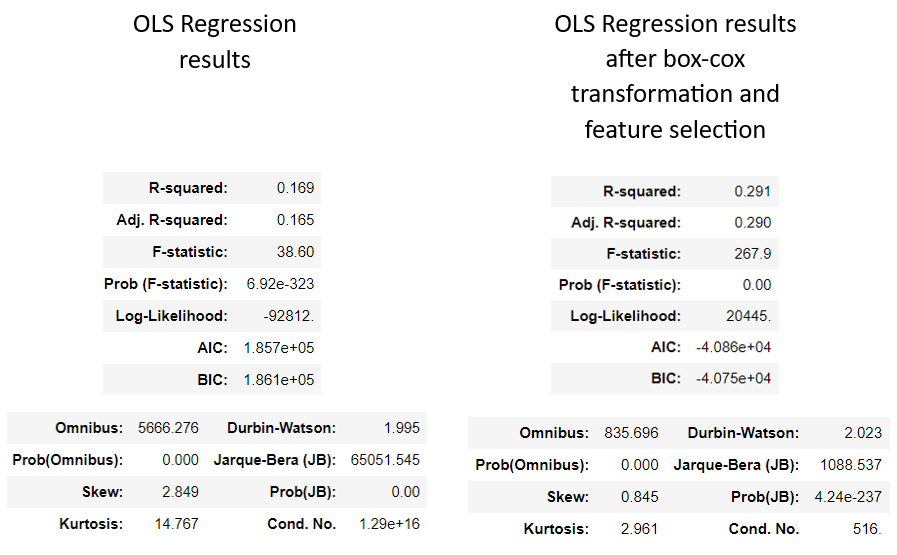

In [134]:
Image("OLS.png")

##### OLS Model is not suitable for our CLV prediction since box-cox transformation failed and R-square value is low

##### Train-Test Split

In [135]:
X=X_new
y= np.log(df1['CLV'])         
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [136]:
X_train.head()

,Monthly Premium Auto,Number of Open Complaints,Number of Policies,Coverage_Extended,Coverage_Premium,Education_High School or Below,EmploymentStatus_Employed,Marital Status_Single,Policy_Corporate L2,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Vehicle Class_SUV,Vehicle Class_Sports Car
434,130,0,1,1,0,0,1,1,1,1,0,0,1,0
4641,131,0,1,1,0,0,1,0,0,0,0,1,1,0
4952,139,0,1,1,0,0,0,0,0,0,0,0,0,1
1489,121,0,8,1,0,0,0,1,0,1,0,0,0,1
812,83,1,1,1,0,0,1,1,0,0,0,1,0,0


In [137]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6393, 14)
(6393,)
(2741, 14)
(2741,)


### Linear Regression

In [138]:
l = LinearRegression()
model = l.fit(X_train,y_train)
print(f'R^2 score for training set: {l.score(X_train, y_train)}')
print(f'R^2 score for test set: {l.score(X_test, y_test)}')

R^2 score for training set: 0.2570328533211187
R^2 score for test set: 0.26309840528549455


In [139]:
y_pred = model.predict(X_test)

In [140]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.5740244714828385
MAE 0.44339185926688346
R-squared: 0.26309840528549455


### Rigde and Lasso Regression

In [141]:
rid=Ridge(alpha=0.1,normalize=True)
rid.fit(X_train,y_train)
print('Ridge Regression')
y_pred = rid.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Ridge Regression
RMSE: 0.575007421205487
R-squared: 0.2605725290362634


In [142]:
rid=Ridge(alpha=1.0,normalize=True)
rid.fit(X_train,y_train)
print('Ridge Regression')
y_pred = rid.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Ridge Regression
RMSE: 0.5947701667177465
R-squared: 0.20887149179178366


In [143]:
lasso = Lasso(random_state=1)
lasso.fit(X_train,y_train)
print('Lasso Regression')
y_pred = lasso.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Lasso Regression
RMSE: 0.5996258438178986
R-squared: 0.1959012872686573


### Decision Tree

In [144]:
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.2631942307424504
MAE 0.10930618784717495
R-squared: 0.8450821674742954


### Random Forest 

In [145]:
rf = RandomForestRegressor(random_state=1)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.2127125477521747
MAE 0.09562028440462136
R-squared: 0.8988106280661363


## Hyperparameter tuning of Random Forest

### Using RandomizedSearchCV

In [403]:

rf = RandomForestRegressor()

params = {
        'max_depth' : randint(low=1, high=50),
        'n_estimators' : randint(low=1, high=500),
        "bootstrap" : [True, False],
        'max_features': ['auto', 'sqrt', 'log2']
        }

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    return_train_score=True
)

random_search.fit(X, y)

print(random_search.best_params_)

{'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 453}


In [404]:
rf = RandomForestRegressor(**random_search.best_params_)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.2110222596914294
MAE 0.10521388399746473
R-squared: 0.9004124105707361


In [273]:
def objective(trial):
    # Defining the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 10, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    # Creating the Random Forest regressor with the suggested hyperparameters
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=1
    )
    
    # Performing cross-validation using the chosen hyperparameters
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Returning the negative mean squared error as the objective value for optimization
    return -scores.mean()

In [274]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Printing the best hyperparameters found
best_params = study.best_params
print('Best Hyperparameters:', best_params)

[I 2023-06-19 22:16:35,701] A new study created in memory with name: no-name-7a809a86-11b6-4498-a321-28e07f69622a
[I 2023-06-19 22:17:21,075] Trial 0 finished with value: 0.03873495816211496 and parameters: {'n_estimators': 500, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.03873495816211496.
[I 2023-06-19 22:17:45,835] Trial 1 finished with value: 0.0390198944074846 and parameters: {'n_estimators': 300, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.03873495816211496.
[I 2023-06-19 22:19:08,693] Trial 2 finished with value: 0.03888649886894249 and parameters: {'n_estimators': 900, 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.03873495816211496.
[I 2023-06-19 22:20:04,101] Trial 3 finished with value: 0.03910410493835825 and parameters: {'n_estimators': 700, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with

[I 2023-06-19 23:27:48,309] Trial 35 finished with value: 0.03901439181910964 and parameters: {'n_estimators': 700, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 23 with value: 0.038456492605782835.
[I 2023-06-19 23:28:49,867] Trial 36 finished with value: 0.03913387692326654 and parameters: {'n_estimators': 600, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 23 with value: 0.038456492605782835.
[I 2023-06-20 00:44:40,785] Trial 37 finished with value: 0.03843244854409179 and parameters: {'n_estimators': 900, 'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 37 with value: 0.03843244854409179.
[I 2023-06-20 00:46:27,581] Trial 38 finished with value: 0.038887104579520826 and parameters: {'n_estimators': 900, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 37 with value: 0.03843244854409179.
[I 2023-06-20 00:48:44,972] Trial 39 finished with value: 0.0384695006744

[I 2023-06-20 07:15:25,875] Trial 71 finished with value: 0.038442721410632874 and parameters: {'n_estimators': 1000, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 37 with value: 0.03843244854409179.
[I 2023-06-20 07:16:55,516] Trial 72 finished with value: 0.038434551559609675 and parameters: {'n_estimators': 1000, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 37 with value: 0.03843244854409179.
[I 2023-06-20 07:18:16,210] Trial 73 finished with value: 0.03844064421731108 and parameters: {'n_estimators': 900, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 37 with value: 0.03843244854409179.
[I 2023-06-20 07:19:44,309] Trial 74 finished with value: 0.03851990574836721 and parameters: {'n_estimators': 900, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 37 with value: 0.03843244854409179.
[I 2023-06-20 07:21:09,085] Trial 75 finished with value: 0.038440644217

Best Hyperparameters: {'n_estimators': 900, 'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 2}


In [406]:
# Creating the Random Forest regressor with the best hyperparameters
best_rf = RandomForestRegressor(
    n_estimators=900,
    max_depth=18,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=1
)

# Fitting the model on the training data
best_rf.fit(X_train, y_train)

# Making predictions on the test data
y_pred = best_rf.predict(X_test)

# Calculating evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

RMSE: 0.20846526890933997
MAE: 0.09702097875805586
R-squared: 0.9028112263544814


### Adaboost Regressor

In [418]:
adaboost = AdaBoostRegressor()
adaboost.fit(X_train, y_train)

AdaBoostRegressor()

In [419]:
y_pred = adaboost.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.2542957679715411
MAE 0.1843065910525959
R-squared: 0.8553804696340565


In [423]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False)[:10]

,Score
Number of Policies,0.732326
Monthly Premium Auto,0.247470
EmploymentStatus_Employed,0.005724
Number of Open Complaints,0.003455
Coverage_Extended,0.003222
Marital Status_Single,0.001912
Renew Offer Type_Offer2,0.001696
Education_High School or Below,0.001196
Vehicle Class_Sports Car,0.000698
Renew Offer Type_Offer4,0.000591


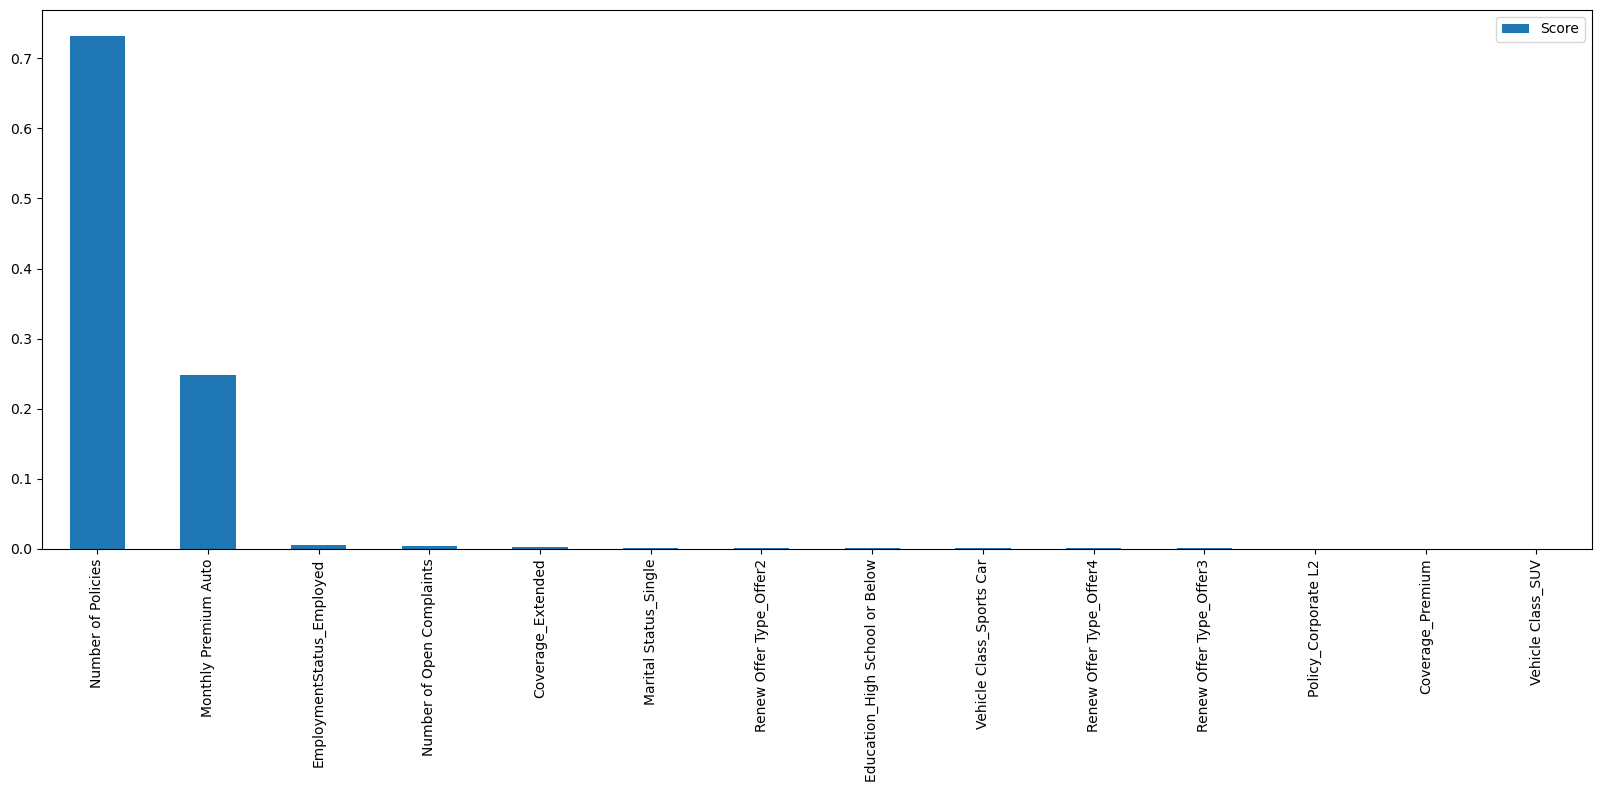

In [424]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()

**Random Forest Model with hyperparameter tuning using Optuna gave the best RMSE and R^2 score**

**Number of Policies and Monthly Premium Auto are the most important features in predicting CLV**

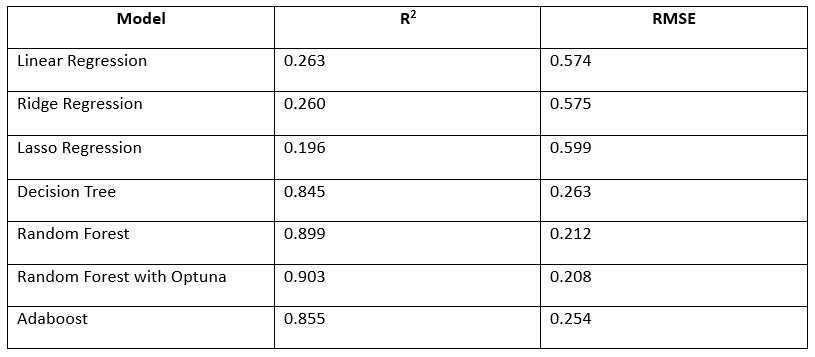

In [1]:
from IPython.display import Image
Image("performance2.png")